# 선형회귀 실습

# 데이터셋 구축

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


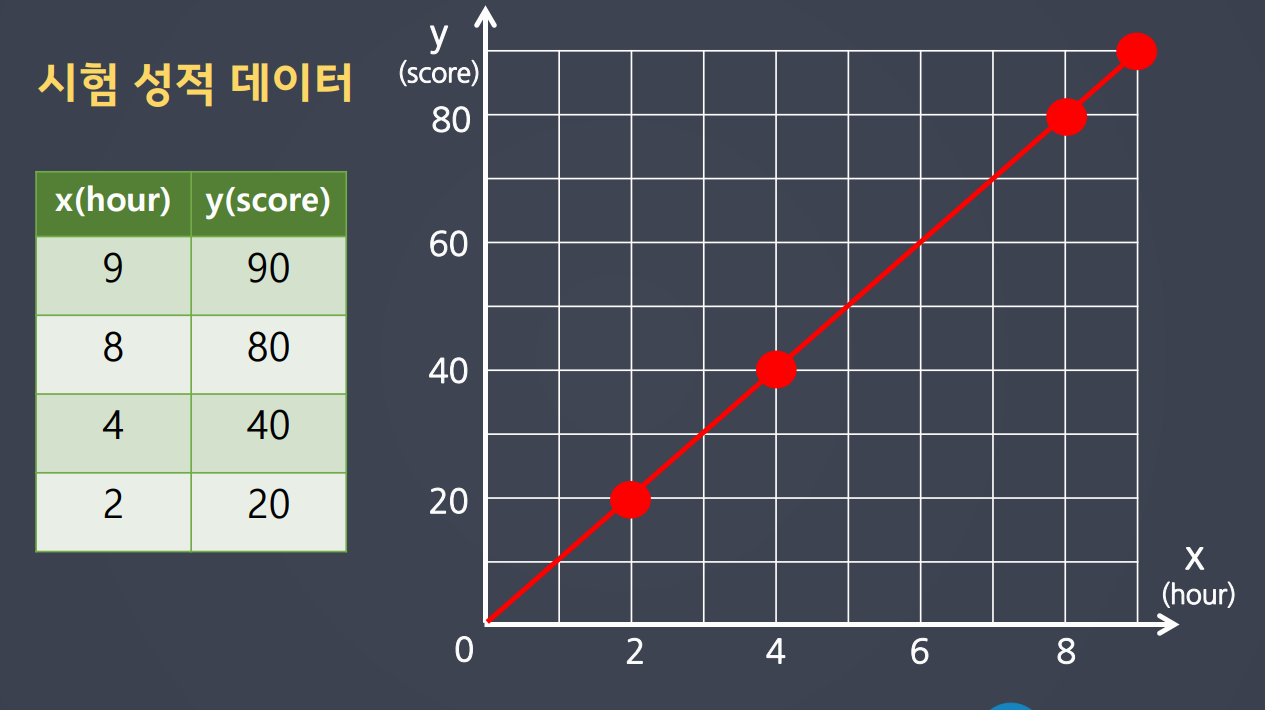

In [4]:
score_df = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                        columns =['공부시간(x)','성적(y)'],
                        index = ['해도', '명훈','예호', '영화'])
score_df
#가장 적절한 공식 Y = 10X+0

,공부시간(x),성적(y)
해도,2,20
명훈,4,40
예호,8,80
영화,9,90


In [2]:
from sklearn.linear_model import LinearRegression

In [6]:
#문제와 답 분리
X = score_df[['공부시간(x)']]
#대괄호를 친것과 안친것의 차이: 대괄호를 넣으면 데이터프레임 없으면 시리즈 1차원이나 2차원이냐 
#학습을 할 때 입력특성은 두개 이상이 일반적임 2차원 형식으로 데이터가 들어올거라고 예상하고 만듬
#fit할때 X를 무조건 2차원으로 해야 됨
y = score_df['성적(y)']

In [3]:
linear_model = LinearRegression()
linear_model.fit(X,y)

NameError: name 'X' is not defined

In [8]:
print(linear_model.coef_) #가중치 확인
print(linear_model.intercept_) #절편 확인

[10.]
7.105427357601002e-15


알파벳 e 뒤에 -가 붙어있으면 그 만큼 왼쪽으로 소수점 옴기기


선형모델이 어떻게 그 공식이 제일 좋다고 판단했는지 알아야 한다
평균제곱오차


실제 현실세계의 데이터들은 패턴이 다양하게 나타난다 
하나의 결과가 뚜렷한 원인이 있는 경우는 거의 없다


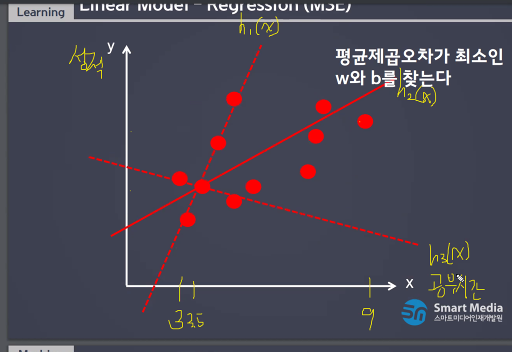

이중에서 중간에 있는 h2가 제일 적합함
이유: h1 공부한 시간 대비 성적이 늘어나는 속도가 너무 급격하다 
      h3 데이터는 올라간다고 하고 있는데 h3는 떨어지고 있어서 
이렇게 감보다는 수치로 판단 할 수 있어야 한다
그래서 평균제곱오차 로 알아볼 수 있다


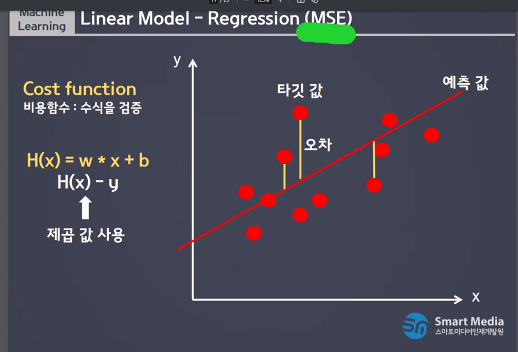

MSE = mean squerd error 평균제곱오차 
오차: 실제 데이터와 가설 사이의 예측
    이런 평균제곱함수 부르는 이유: 비용함수 , loss function
모델의 가설이 얼마나 좋은지 나쁜지를 평가하는 함수를 비용함수 라고 한다 
여러종류의 비용함수 알고리즘 중에서 선형회귀가 사용하는 알고리즘은 평균 제곱 오차

### 가중치 변화에 따른 MSE그래프 그리기

In [9]:
def h(x,w): 
    return w*x+0
# w가 가중치 

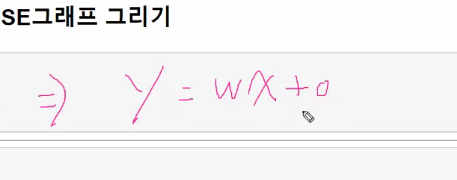

In [13]:
h(score_df['공부시간(x)'],5)


해도    10
명훈    20
예호    40
영화    45
Name: 공부시간(x), dtype: int64

In [14]:
#평균제곱오차
def MSE(x,w,y):
    y_pre = h(x,w) #예측값
    error = y_pre-y #오차
    return (error**2).mean()

In [20]:
MSE(score_df['공부시간(x)'],10,score_df['성적(y)'])

10.3125

In [ ]:
최적인 0에서 가까운거 부터 멀어지면 멀어질 수록 엄청 평균제곱오차가 커진다 

In [22]:
mse_list = [] #가중치 변화에 따른 mse가 들어갈 리스트 
for w in range(21): # w를 0부터 20까지 변화
    mse = MSE(score_df['공부시간(x)'],w,score_df['성적(y)'])
    mse_list.append(mse)

In [3]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


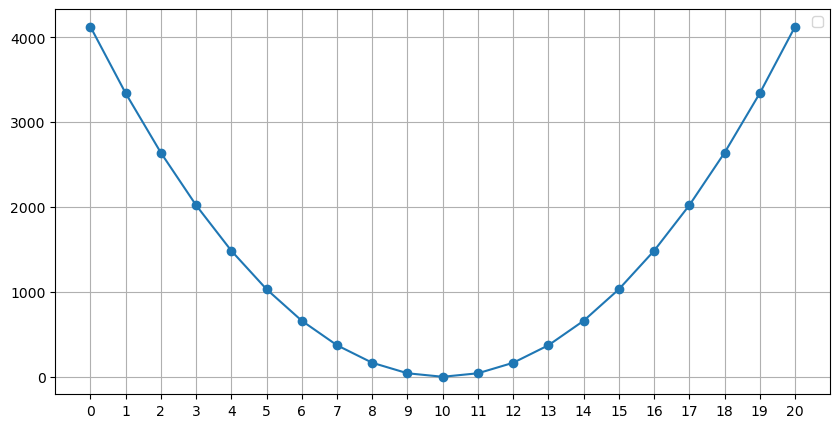

In [34]:
plt.figure(figsize = (10,5))
plt.plot(mse_list, marker = "o")
plt.xticks(range(21))
plt.legend()
plt.grid()
plt.show()

In [ ]:
y=2x+0
x가 변할때 y가 얼마만큼 변하냐 

In [ ]:
비용함수의 기울기를 구한다  w가 1올라갈떄 평균제곱오차 값이 올라감
현재 w의 변화량분에 평균제곱오차의 변화량을 구한다 

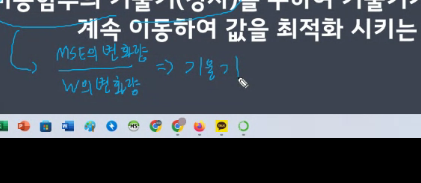

In [ ]:
평균제곱오차의 값이 계속해서 내려가야 한다

In [ ]:
현재 가중치를 보고 기울기를 내려야 하는지 올려야 하는지 알아볼수 있더ㅏ --> 경사하강법

In [ ]:
cost function MSE
이거만 있으면 최적을 찾을 수 없다
경사하강법을 통해 이 w를 올리면 좋을지 내리면 좋을지 알 수 있게 한다 
이 모델의 공식의 최적화값을 찾는데 도음을 준다고 해서 optimizer

In [4]:
from sklearn.linear_model import SGDRegressor

In [37]:
sgd_model  = SGDRegressor(verbose=1, #학습 과정 로그 출력
                          max_iter=1000, #최대 반복 횟수 
                          epsilon=0.1, #반복을 멈추는 MSE값 기준
                          eta0=0.01,#학습률
                          n_iter_no_change=5 #MSE 값이 감소되지 않더라도 지켜보는 횟수 
                         )

In [38]:
sgd_model.fit(X,y)
#loss가 MSE갑값
#normㅣ: w 기울기값
#bias: 절편 

-- Epoch 1
Norm: 8.52, NNZs: 1, Bias: 1.143302, T: 4, Avg. loss: 1052.632935
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.48, NNZs: 1, Bias: 1.283107, T: 8, Avg. loss: 19.916155
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.71, NNZs: 1, Bias: 1.308025, T: 12, Avg. loss: 1.735518
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.79, NNZs: 1, Bias: 1.313831, T: 16, Avg. loss: 0.331947
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.81, NNZs: 1, Bias: 1.310838, T: 20, Avg. loss: 0.202269
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.82, NNZs: 1, Bias: 1.308067, T: 24, Avg. loss: 0.183658
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.82, NNZs: 1, Bias: 1.303028, T: 28, Avg. loss: 0.180860
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.83, NNZs: 1, Bias: 1.299495, T: 32, Avg. loss: 0.177839
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.294543, T: 36, Avg. loss: 0.177411
Total training time: 0.00 seconds.
-- Epoch

SGDRegressor(verbose=1)

In [39]:
sgd_model.coef_ #기울기

array([9.84056275])

In [40]:
sgd_model.intercept_ #절편

array([1.16167067])

#### 선형회귀 모델 활용하기
- 특성확장, 다항회귀
- 모델 정규화가 적용된 모델 사용

In [5]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
dataq = x, target = y


NameError: name 'y' is not defined

In [9]:
boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                        'NOX','RM', 'AGE', 'DIS', 'RAD',
                                        'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
target_sr = pd.Series(target,name = "MEDV")
target_sr

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(boston_df, target_sr, test_size =0.2, random_state = 823)

## 단순선형회귀

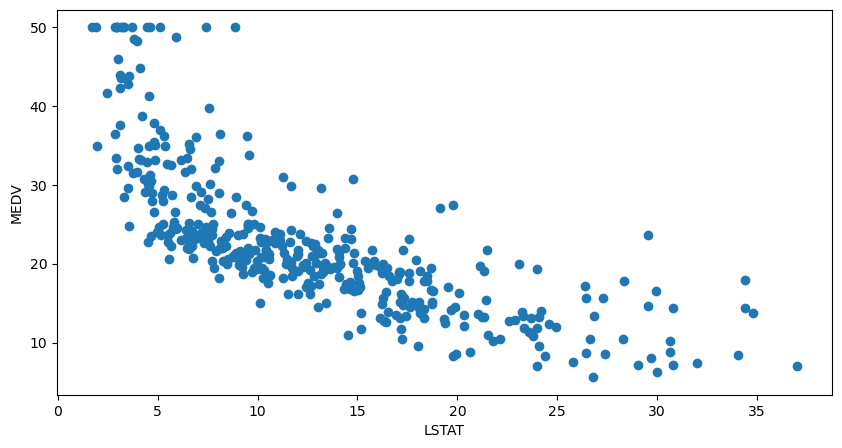

In [10]:
#LSTAT와 MEDV 사이의 관계 그래프를 확인해보자
plt.figure(figsize = (10,5))
plt.scatter(X_train['LSTAT'], y_train)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [ ]:
#LSTAT 하층계급의 비율 이 비율이늘어나면 늘어날 수록 집값이 떨어진다 

In [10]:
house_linear = LinearRegression()
house_linear.fit(X_train[['LSTAT']], y_train)

LinearRegression()

In [15]:
print(house_linear.coef_) #기울기

[-0.96179679]


In [16]:
print(house_linear.intercept_) #절편

34.80022587064779


In [10]:
y_pre = house_linear.predict(np.arange(40). reshape(-1,1))
#1차원 넘파이 배열을 2차원으로 바꿔줌 
#-1은 너가 알아서 계산하란뜻 열은 1이라는 뜻

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
y_pre

array([34.80022587, 33.83842908, 32.87663229, 31.9148355 , 30.95303871,
       29.99124192, 29.02944513, 28.06764834, 27.10585155, 26.14405476,
       25.18225797, 24.22046118, 23.25866439, 22.2968676 , 21.33507081,
       20.37327402, 19.41147723, 18.44968044, 17.48788365, 16.52608686,
       15.56429007, 14.60249328, 13.64069649, 12.6788997 , 11.71710291,
       10.75530612,  9.79350933,  8.83171254,  7.86991575,  6.90811896,
        5.94632218,  4.98452539,  4.0227286 ,  3.06093181,  2.09913502,
        1.13733823,  0.17554144, -0.78625535, -1.74805214, -2.70984893])

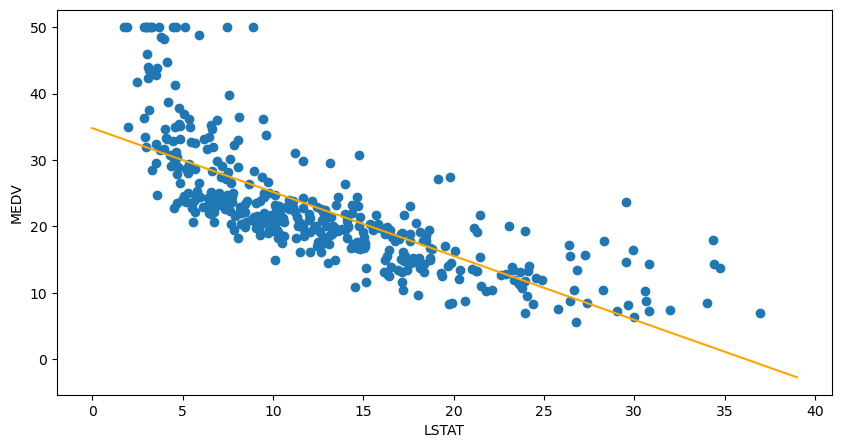

In [19]:
#LSTAT와 MEDV 사이의 관계 그래프를 확인해보자
plt.figure(figsize = (10,5))
plt.scatter(X_train['LSTAT'], y_train)
plt.plot(y_pre, c = 'orange')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [ ]:
다항회귀: 직선으로만 하는게 아니라 차수를 높이거 곡선으로도 

In [ ]:
선형회귀의 공식에 고차항을 추가해주면 직선이 아니라 고차원의 곡선이 된다 

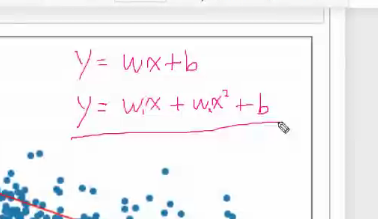

In [39]:
#특성확장
#단순 선형회귀는 직선형태아ㅣ 예측이 학습
#데이터 패턴에 따라 곡선의 예측선이 필요한 경우 특성을 확장해 다항회귀 진행해볼 수 있다
boston_df["LSTAT XLSTAT"] = boston_df["LSTAT"] * boston_df["LSTAT"]
house_linear2 = LinearRegression()
#house_linear2.fit
house_linear2.fit(X_train[['LSTAT', "LSTAT X LSTAT"]], y_train)

KeyError: "['LSTAT X LSTAT'] not in index"

In [ ]:
data_df = pd.DataFrame(np.arrange(40), reshape(-1,1))
ddata_df[1]=

In [27]:
plt.figure(figsize = (10,5))
plt.scatter(
    X_train[['LSTAT', "LISTAT X LISTAT"]], y_train)


KeyError: "['LISTAT X LISTAT'] not in index"

<Figure size 1000x500 with 0 Axes>

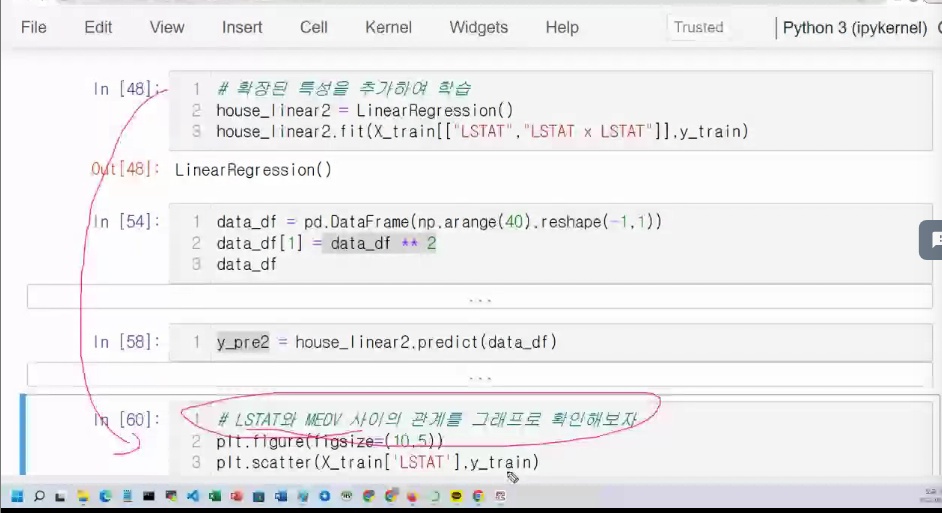

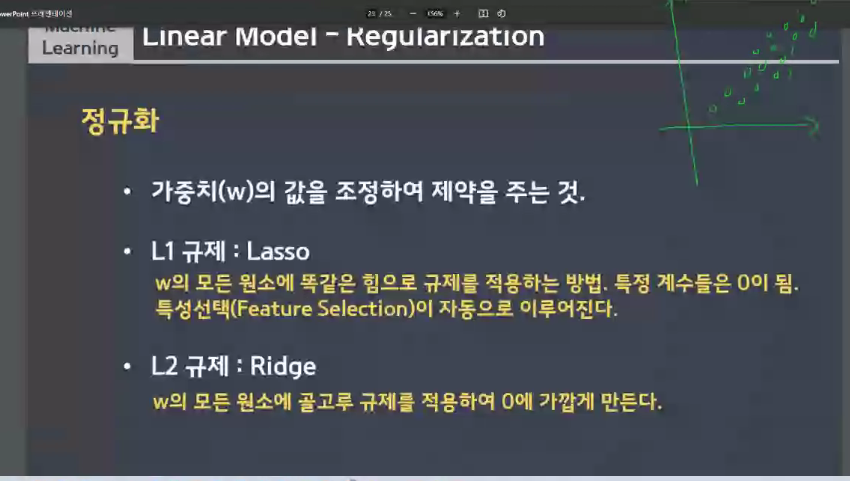

In [ ]:
Lasso: 선형모델은 다 동일한 만큼 w를 깍아줌
        가중치들 중에서 0으로 수렴하는 가중치가 있을 수 있다  == 특성선택 효과가 일어남

Ridge : 원래 W가 크면 규제를 많이 주고 원래 W가 작으면 적게 깍은다 
        규제를 아무리 많이 줘도 W값이 0 에 가까워지기만 한다
일반적으로 규제를 준다고 하면 L2가 기본

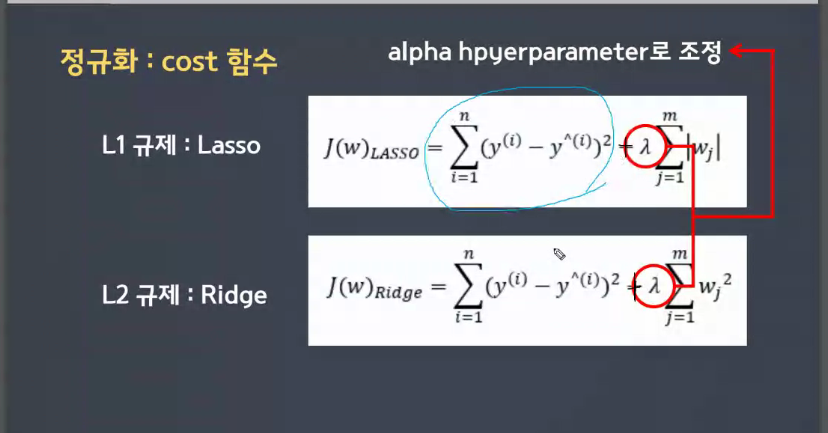

In [ ]:
앞에 시그마 부분이 평균제곱오차 부분
L1 값은 뒤에 가중치의 총합
학습할떄 자연스럽게 가중치가 적어지도록 

In [ ]:
알파로 규제의 강도를 적게 줄건지 규제의 강도를 강하게 줄건지 정함

In [ ]:
곡선으로 휘어졌다면 단순회귀 보다는 다항회귀 하는 것이 좋음

## 규제모델 사용하기
- LInearRegression에서는 과대적합을 제어할 방법아 없다
- 규제모델인 Ridge 와 lasso를 이용해 과대적합을 제어하자

In [8]:
#과대적합 유도하기 -> 특성확장 사용
colums_list = X_train.columns
for c_name1 in colums_list:
    for c_name2 in colums_list:
        X_train[c_name1+"X"+c_name2] = X_train[c_name1]* X_train[c_name2]

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_23020\1977529780.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[c_name1+"X"+c_name2] = X_train[c_name1]* X_train[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_23020\1977529780.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[c_name1+"X"+c_name2] = X_train[c_name1]* X_train[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_23020\1977529780.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [11]:
colums_list = X_test.columns
for c_name1 in colums_list:
     for c_name2 in colums_list:
        X_test[c_name1+"X"+c_name2] = X_test[c_name1]* X_test[c_name2]

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_23020\1520420500.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[c_name1+"X"+c_name2] = X_test[c_name1]* X_test[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_23020\1520420500.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[c_name1+"X"+c_name2] = X_test[c_name1]* X_test[c_name2]
C:\Users\gjaischool\AppData\Local\Temp\ipykernel_23020\1520420500.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [43]:
print(X_train.shape)
print(X_test.shape)

(404, 26)
(102, 39)


In [14]:
from sklearn.linear_model import Ridge, Lasso

In [15]:
linear_model =LinearRegression()
ridge_mode1 = Ridge()
lasso_model = Lasso()

In [16]:
#학습
linear_model.fit(X_train, y_train)
ridge_mode1.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso()

In [17]:
#평가 
linear_score = linear_model.score(X_test, y_test)
ridge_score = ridge_mode1.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)

In [22]:
print("linear_score:", linear_score)
print("ridge_score:", ridge_score)
print("lasso_score:", lasso_score)

linear_score: 0.6489045689704974
ridge_score: 0.790554463429431
lasso_score: 0.7344202188444044


In [ ]:
.분류: 정답 데이터가 범주( 정해진 카테고리 내에서만 등장)
    평가방법: 정확도 나올 수 있는 값들이 정해져  있기 때문에
회귀: 정답 데이터가 수치형(다양한 값들이 등장가능 범위가 지정x)
    오차를 기반으로 한 평가데이터 오차가 많이 났냐 오차가 적게났냐 

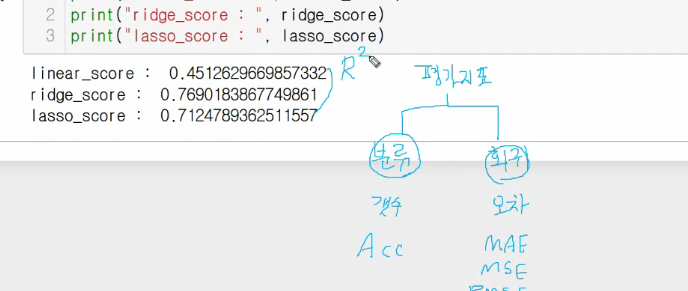

In [ ]:
 R스퀘어 점수: 회귀 평가 방법

### 회귀 평가방법

- 오차 기반의 평가지표를 활용한다
- MAE
- MSE
- RMSE
- R2

In [ ]:
-MAE
평균절대값 오차
마지막에 활용해 모델의 상태를 볼 수 있음 이게 기본


In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error #평균제곱오차

In [ ]:
#MAE로 평가했을때 

In [31]:
pre1 = linear_model.predict(X_test)
mae1 = mean_absolute_error(y_test,pre1)
pre3 = ridge_mode1.predict(X_test)
mae2 = mean_absolute_error(y_test,pre3)
pre4 = lasso_model.predict(X_test)
mae3 = mean_absolute_error(y_test,pre4)
print("MAE : ",mae1)
print("MAE : ",mae2)
print("MAE : ",mae3)

MAE :  3.9057878412776263
MAE :  3.8933532199918175
MAE :  3.7722830984337477


- 예측값과 실제값의 차이를 구한뒤 절대값을 구한뒤  평균을 낸다 

In [19]:
print("MAE: ", mae1)

MAE:  3.9057878412776263


In [23]:
pre2 = linear_model.predict(X_test)
mae1 = mean_squared_error(y_test,pre2)
print("MSE: ", mae1)

MSE:  32.07418221105795


In [ ]:
#MSE로 평가 했을때  더 잘못된것을  강조해서 보여준다 

In [32]:
pre2 = linear_model.predict(X_test)
mse1 = mean_squared_error(y_test,pre2)
pre5 = ridge_mode1.predict(X_test)
mse2 = mean_squared_error(y_test,pre5)
pre6 = lasso_model.predict(X_test)
mse3 = mean_squared_error(y_test,pre6)
print("MSE : ",mse1)
print("MSE : ",mse2)
print("MSE : ",mse3)

MSE :  32.07418221105795
MSE :  32.72033230316142
MSE :  30.7568849139236


 - 내가 해당 데이터의 도메인 지식이 있으면 이 값을 보고 머신러닝이 좋은지 아닌지 해석이 가능
- 상대적이기 때문에

In [ ]:
#모든 회귀데이터의 평가지식을 0~1사이 값으로 환산
#0에 가까울 수록 안좋고 1에 가까울 수록 괜찮은 모델


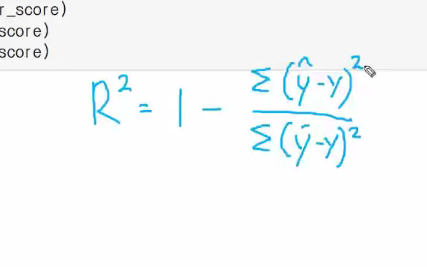

In [ ]:
#1일때 1-0해서 뒤에 나오는게 0일때 1이 나온다 뒤에 있는 항이 0이라는 것은 예측값과 실제 데이터와 차이가 없더 
#y^예측 y 실제값

#0일때 뒤에 있는 항이 1이 되어야 한다 1이 된다는 애기는 모델이 만든 예측값이 전체 데이터를 평균낸것과 다를받가 없다
#모델링 안돌린것과 같다 
#가끔 R스퀘어가 음수가 나오는것은 오차값이 너무 커져서  음수가 나오는것임

## 튜닝

In [40]:
ridge_score_list = []
for a in [0.001,0.01,0.1, 1, 10, 100, 1000,10000]:
    m = Ridge(alpha =a) #규제를 약 --> 강으로 변경
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    ridge_score_list.append(score)
    
    
    
    
    
    # 천분의 1배만ㅋ트, 100분의 1배만큼, 10분의 1배만큼, 1은 기본 규제 , 10 , 100 
#이렇게 10의 배수값으로 규제를 줌

In [41]:
lasso_score_list = []
for a in [0.001,0.01,0.1, 1, 10, 100, 1000,10000]:
    m =Lasso(alpha =a) #규제를 약 --> 강으로 변경
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    lasso_score_list.append(score)
    

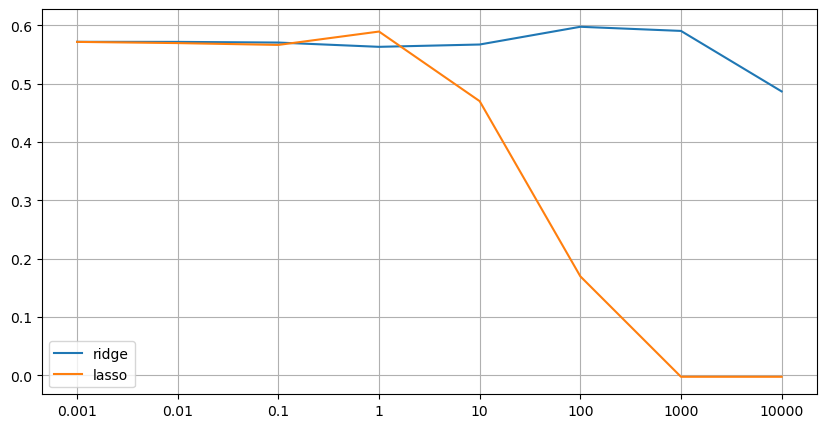

In [43]:
plt.figure(figsize = (10,5))
plt.plot(ridge_score_list, label = "ridge")
plt.plot(lasso_score_list, label = "lasso")
plt.xticks(range(8),[0.001,0.01,0.1, 1, 10, 100, 1000,10000] )
plt.legend()
plt.grid()
plt.show()

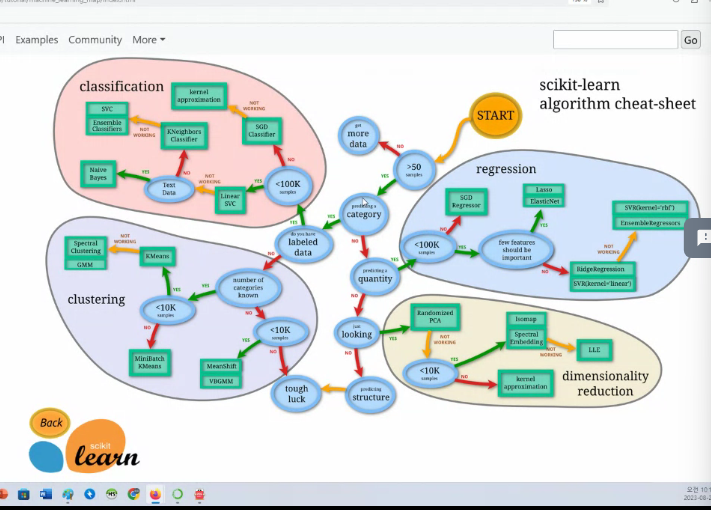

In [ ]:
입력특성 탈락 시켜야 할게 있으면 라쏘 없으면 그냥 릿지